In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset insert

In [ ]:
import pandas as pd
import numpy as np
# dataset_B = pd.read_csv("/content/drive/MyDrive/cw/dataset/dataset_B.csv")
# dataset_B.head()

# insert of diff. dataset
#dataset_C = pd.read_csv("/content/drive/MyDrive/cw/dataset/dataset_C.csv")
# dataset_D = pd.read_csv("/content/drive/MyDrive/cw/dataset/dataset_D.csv")
# dataset_E = pd.read_csv("/content/drive/MyDrive/cw/dataset/dataset_E.csv")

dataset1 = pd.read_excel("/content/drive/MyDrive/master project/data_del_blank.xlsx")
dataset2 = pd.read_excel("/content/drive/MyDrive/master project/data_del_remove.xlsx")
dataset3 = pd.read_excel("/content/drive/MyDrive/master project/data_fill.xlsx")
dataset4 = pd.read_excel("/content/drive/MyDrive/master project/data_fill_remove.xlsx")

# Data normalization

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# PDT = le.fit_transform(dataset_C['PDT'])
# ES = le.fit_transform(dataset_C['ES'])
# FS = le.fit_transform(dataset_C['FS'])
# BFL = le.fit_transform(dataset_C['BFL'])

# dataset_C['PDT'] = PDT
# dataset_C['ES'] = ES
# dataset_C['FS'] = FS
# dataset_C['BFL'] = BFL

In [ ]:
#dataset_C.to_excel("/content/drive/MyDrive/master project/data_fill.xlsx")

In [ ]:
X = dataset2.drop(['JSC','VOC','FF','PCE'], axis=1)
y = dataset2[["JSC","VOC","FF","PCE"]]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for feature in X.columns:
  X[feature] = scaler.fit_transform(X[[feature]])
X = np.array(X)
y = np.array(y)

In [ ]:
X.shape

(176, 12)

In [ ]:
# select PCE as target 3=PCE 2=Jsc 1=Voc 0=FF
T = y[:,1]
T.shape

(176,)

# RBFNN

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

x_train, x_test, y_train, y_test = train_test_split(X, T, test_size=0.2,random_state=42)
print(x_train.shape,y_train.shape, x_test.shape,y_test.shape)

(140, 12) (140,) (36, 12) (36,)


In [ ]:
from math import sqrt, exp
from sklearn.metrics.pairwise import distance_metrics
from scipy import *  
from scipy.linalg import norm, pinv  
from sklearn.cluster import KMeans 
   
class rbfnn:  
       
    def __init__(self, X, num_hidden, C=100):  
        self.num_sample = X.shape[0]  
        self.num_feature = X.shape[1] 
        self.num_hidden = num_hidden  
        self.center = self.cluster(X)  
        self.std = self.std_calcAct(self.center) 
        self.H = self.H_calcAct(X)
        self.C = C 
        self.H0 = np.linalg.pinv(self.H + self.C*np.eye(self.num_sample,self.num_hidden))  
           
    def cluster(self, X):
      kmeans = KMeans(n_clusters=self.num_hidden)
      kmeans.fit_transform(X)
      center = kmeans.cluster_centers_
      return center
    
    def std_calcAct(self, center):
      global distance
      for _ in range(self.num_hidden):
        distance = []
        for i in range(len(center)):
          for j in range(len(center)):
            distance.append(np.linalg.norm(center[i]-center[j],2))
      std = max(distance)/sqrt(2*self.num_hidden)
      return std      
       
    def H_calcAct(self, input):
      H = np.zeros([len(input),self.num_hidden])
      for i in range(len(input)):
        for j in range(self.num_hidden):
          H[i][j] = exp(- np.linalg.norm(self.center[j] - input[i],2)/ 2 * self.std * self.std)
      return H  
        
       
    def train(self, T):  
        self.W = np.dot(self.H0, T)
        return self.W
           
    def test(self, x_test):  
         
        H_test = self.H_calcAct(x_test)  
        result = np.dot(H_test, self.W)  
        return result  

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
model = rbfnn(x_train,70,C=0.0001) 
''' obtain H0 '''

rbfnn.train(model,y_train)
''' train model to get W '''

y_pred = rbfnn.test(model, x_test)


mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE of test: %.2f" % sqrt(mse))
print(f"r2 Score Of Test Set : {r2_score(y_test, y_pred)}")

MSE: 2865.59
RMSE of test: 53.53
r2 Score Of Test Set : 0.7345306453584748


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  


In [ ]:
y_tra = rbfnn.test(model, x_train)


mse = mean_squared_error(y_train, y_tra)
print("MSE: %.2f" % mse)
print("RMSE of train: %.2f" % sqrt(mse))
print(f"r2 Score Of train Set : {r2_score(y_train, y_tra)}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead


MSE: 989.10
RMSE of train: 31.45
r2 Score Of train Set : 0.9164911239190432


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  


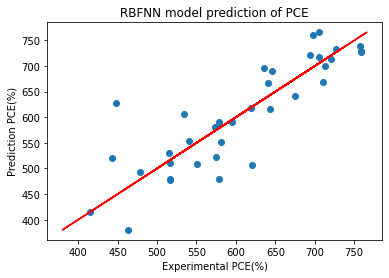

In [ ]:
plt.scatter(y_pred, y_test,marker='o')
plt.plot(y_test, y_test,'r-')
plt.title("RBFNN model prediction of PCE")
plt.xlabel("Experimental PCE(%)")
plt.ylabel("Prediction PCE(%)")
plt.show()

# ELM

In [ ]:
!cp /content/drive/MyDrive/elm/elm.py /content

In [ ]:
import elm as elm
model = elm.elm(hidden_units=30, activation_function='sigmoid', random_type='normal', x=x_train, y=y_train, C=4.23, elm_type='reg') 
beta, train_score, running_time = model.fit('no_re')
print("regression beta:\n", beta)
print("regression train score:", train_score)
print("regression running time:", running_time)

regression beta:
 [-1149.21686921 -2398.63303646  1473.58870379 20599.06860309
    87.44745573 -6863.94716393 -4882.19691723 -3321.8726744
 -3791.4962601   -437.90871816  -555.54095077  -590.9514374
 -2447.43011938 -2337.70129996  3447.67924655 -4169.63633558
  3716.62053375  1012.41078334   570.08576679 -6113.09834178
    69.21871427 -4900.10782918  -547.15135403  5721.39287267
 -7131.55030751  4285.4949      4463.0065599   6382.31442135
 -7852.21335535  5414.74956811]
regression train score: 59.99221022915406
regression running time: 0.0011130000000001417


regression result: [551.97950401 500.90482424 500.63311309 797.70768386 804.78207156
 595.02295148 747.77665661 690.71631129 592.48682714 858.71402971
 530.62801328 594.30541711 557.93286098 747.5242857  465.04252606
 733.70357176 758.41962405 559.42131476 583.78757048 658.01126306
 552.60674518 724.50696056 498.310013   458.41042493 735.7875201
 491.32850753 828.68848346 557.31085526 682.24026486 472.66278587
 720.46807108 646.66114581 861.99710407 775.33860496 465.81879286
 536.75613507]
regression score: 59.99221022915406
(140,) (36,)


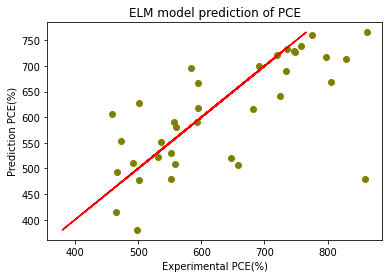

In [ ]:
prediction = model.predict(x_test)
print("regression result:", prediction.reshape(-1, ))
print("regression score:", model.score(x_test, y_test))
model.y

plt.scatter(prediction, y_test,marker='o', color='olive')
plt.plot(y_test, y_test,'r-')
plt.title("ELM model prediction of PCE")
plt.xlabel("Experimental PCE(%)")
plt.ylabel("Prediction PCE(%)")
print(model.y.shape, y_test.shape)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from numpy import sqrt

mse_test = mean_squared_error(y_test, prediction)
print(f"r2 Score Of Test Set : {r2_score(y_test, prediction)}")
print("MSE: %.2f" % mse_test)
print("RMSE of test: %.2f" % sqrt(mse_test))


r2 Score Of Test Set : 0.1355375294189115
MSE: 9331.39
RMSE of test: 96.60


In [ ]:
y_predict = model.predict(x_train)

mse = mean_squared_error(y_train, y_predict)
print(f"r2 Score Of Train Set : {r2_score(y_train, y_predict)}")
print("MSE: %.2f" % mse)
print("RMSE of train: %.2f" % sqrt(mse))

r2 Score Of Train Set : 0.6961328415484801
MSE: 3599.07
RMSE of train: 59.99


# SVR

In [ ]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt

linear_svr = SVR(kernel="linear", C=5)
linear_svr.fit(x_train, y_train)
linear_svr_y_predict = linear_svr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from numpy import sqrt


print("r2 of test：", r2_score(y_test, linear_svr_y_predict))

y_prediction = linear_svr.predict(x_test)

mse = mean_squared_error(y_test, y_prediction)

print("MSE: %.2f" % mse)
print("RMSE of test: %.2f" % sqrt(mse))

r2 of test： 0.39192445557317834
MSE: 6563.83
RMSE of test: 81.02


In [ ]:
y_trainPred = linear_svr.predict(x_train)

mse = mean_squared_error(y_train, y_trainPred)

print("r2 of train：", r2_score(y_train, y_trainPred))
print("MSE: %.2f" % mse)
print("RMSE of train: %.2f" % sqrt(mse))

r2 of train： 0.226958831698704
MSE: 9156.06
RMSE of train: 95.69


Text(0, 0.5, 'Prediction PCE(%)')

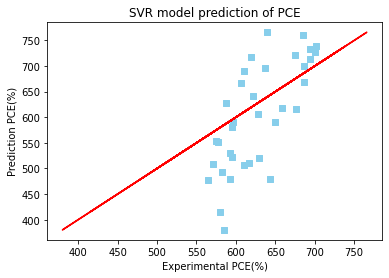

In [ ]:
plt.scatter(y_prediction, y_test,marker='s', color='skyblue')
plt.plot(y_test, y_test,'r-')
plt.title("SVR model prediction of PCE")
plt.xlabel("Experimental PCE(%)")
plt.ylabel("Prediction PCE(%)")

# Data fit plot

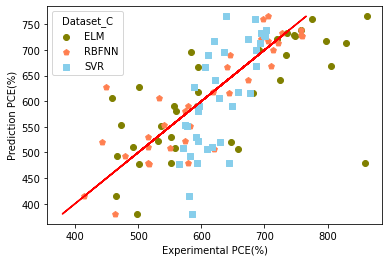

In [ ]:
plt.plot(y_test, y_test,'r-')


plt.scatter(prediction, y_test,marker='o', color='olive',label="ELM")

plt.scatter(y_pred, y_test,marker='p', color='coral',label="RBFNN")

plt.scatter(y_prediction, y_test,marker='s', color='skyblue',label="SVR")

plt.legend(title="Dataset_C")

plt.xlabel("Experimental PCE(%)")
plt.ylabel("Prediction PCE(%)")
plt.show()